In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")

## Perfecting our prediction model: amenities vs. price
Our previous attempts at increasing the R value (see Amenity_count_vs_Price_2) overfit our model and had a limited increase in R value, and therefore could not be kept. This notebook attempts to increase the R value by using a purely linear relationship between amenities and price, but trying to control for different variables. 

Steps: 
    1. import data
    2. create dummy columns based on different values
        - Country
        - property type
        - room type 
    3. create different OLS models to see if holding different variables constant will affect the outcomes
`Accommodates` will always be in our models because it indicates how large the property is, which could have a strong effect on price.

### Step 1: importing data

In [42]:
df = pd.read_pickle("../../Datasets/Data_viz_project/airbnb_listings_price_normalized")

In [43]:
df.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Country', 'latitude',
       'longitude', 'Property type', 'Room type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month', 'Amenity_Count',
       'Country_Average', 'Normalized'],
      dtype='object')

### Step 2: create dummy tables and merge on the new "index" column

In [44]:
df = df.reset_index()

In [45]:
dummy = pd.get_dummies(df["Country"], drop_first=True)

In [46]:
dummy = dummy.reset_index()

In [47]:
dummy_room_type = pd.get_dummies(df["Room type"], drop_first=True).reset_index()

In [48]:
dummy_property_type = pd.get_dummies(df["Property type"], drop_first=True).reset_index()

In [49]:
df = (df.merge(dummy, on="index")
      .merge(dummy_room_type, on="index")
      .merge(dummy_property_type, on="index")
      .drop(columns=("index")))

In [50]:
df_30 = df.loc[df["Amenity_Count"]<=30]

In [14]:
df.columns

Index(['Listing ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Country', 'latitude',
       'longitude', 'Property type', 'Room type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month', 'Amenity_Count',
       'Country_Average', 'Normalized', 'Austria', 'Belgium', 'Canada',
       'Denmark', 'France', 'Germany', 'Greece', 'Hong Kong', 'Ireland',
       'Italy', 'Netherlands', 'Spain', 'Switzerland', 'United Kingdom',
       'United States', 'Private room', 'Shared room', 'Bed & Breakfast',
       'Boat', 'Boutique hotel', 'Bungalow', 'Cabin', 

### Regression 1: Looking at accommodates 

In [54]:
df_30["Const"] = 1

/Users/emilyhorton/opt/anaconda3/envs/backpack_banana/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
X = df_30[["Amenity_Count", "Accommodates", "Const"]]
y = df_30["Normalized"]

model = sm.OLS(y, X).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                 1.012e+05
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        07:43:43   Log-Likelihood:            -3.5126e+05
No. Observations:              371013   AIC:                         7.025e+05
Df Residuals:                  371010   BIC:                         7.026e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Amenity_Count     0.0070      0.000     35.097      0.000       0.007       0.007
Accommodates      0.2246      0.001    431.487      0.000       0.224       0.226
Const             0.1444      0.003     42.886      0.000       0.138       0.151
==============================================================================
Omnibus:                   264949.949   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10445177.869
Skew:                           2.988   Prob(JB):                         0.00
Kurtosis:                      28.298   Cond. No.                         55.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression 2: Looking at different country dummy variables

In [57]:
X = df_30[["Amenity_Count", "Accommodates", "Const", "Austria", 
        "Belgium", "Canada", "Denmark", 
        "France", "Germany", "Greece", 
        "Hong Kong", "Ireland", "Italy",
       "Netherlands", "Spain", "Switzerland",
       "United Kingdom", "United States"]]
y = df_30["Normalized"]

model = sm.OLS(y, X).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        07:43:56   Log-Likelihood:            -3.4853e+05
No. Observations:              371013   AIC:                         6.971e+05
Df Residuals:                  370995   BIC:                         6.973e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Amenity_Count      0.0092      0.000     44.440      0.000       0.009       0.010
Accommodates       0.2289      0.001    438.039      0.000       0.228       0.230
Const              0.1006      0.005     20.091      0.000       0.091       0.110
Austria           -0.0247      0.008     -2.946      0.003      -0.041      -0.008
Belgium            0.0613      0.009      6.818      0.000       0.044       0.079
Canada            -0.0061      0.005     -1.123      0.261      -0.017       0.005
Denmark            0.1152      0.007     17.507      0.000       0.102       0.128
France             0.0735      0.005     15.352      0.000       0.064       0.083
Germany            0.1638      0.006     26.093      0.000       0.152       0.176
Greece            -0.1063      0.011     -9.923      0.000      -0.127      -0.085
Hong Kong          0.1121      0.011     10.322      0.000       0.091       0.133
Ireland            0.0466      0.009      5.006      0.000       0.028       0.065
Italy             -0.1127      0.005    -20.754      0.000      -0.123      -0.102
Netherlands        0.0857      0.006     13.628      0.000       0.073       0.098
Spain             -0.1036      0.005    -20.983      0.000      -0.113      -0.094
Switzerland        0.1754      0.015     11.331      0.000       0.145       0.206
United Kingdom     0.0370      0.005      7.883      0.000       0.028       0.046
United States     -0.0610      0.004    -14.714      0.000      -0.069      -0.053
==============================================================================
Omnibus:                   267950.362   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10892368.802
Skew:                           3.029   Prob(JB):                         0.00
Kurtosis:                      28.844   Cond. No.                         284.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although the R value is better in this model, it is still not of statistical significance. 

### Regression 3: Controlling for  GDP per capita

GDP per capita data pulled from Wikipedia. We used the 2018 World Bank data because it is the closest in time to our estimated time frame from the data: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28PPP%29_per_capita

In [58]:
GDP = {'Australia':51663,
 'Austria':55455,
 'Belgium':51408,
 'Canada':48130,
 'Denmark':55671,
 'France':45342,
 'Germany':53075,
 'Greece':29592,
 'Hong Kong':64597,
 'Ireland':83203,
 'Italy':41830,
 'Netherlands':56329,
 'Spain':39715,
 'Switzerland':68061,
 'United Kingdom':45973,
 'United States':62795}

In [59]:
GDP_list = [GDP[x] for x in df_30["Country"].to_list()]

In [60]:
df_30 = df_30.assign(GDP=GDP_list)

In [61]:
X = df_30[["Amenity_Count", "Accommodates", "Const","GDP"]]
y = df_30["Normalized"]

model = sm.OLS(y, X).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                 6.751e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        07:44:31   Log-Likelihood:            -3.5124e+05
No. Observations:              371013   AIC:                         7.025e+05
Df Residuals:                  371009   BIC:                         7.025e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Amenity_Count     0.0067      0.000     33.335      0.000       0.006       0.007
Accommodates      0.2249      0.001    430.709      0.000       0.224       0.226
Const             0.1111      0.006     17.484      0.000       0.099       0.124
GDP            6.905e-07   1.12e-07      6.172      0.000    4.71e-07     9.1e-07
==============================================================================
Omnibus:                   265057.417   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10473964.492
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      28.334   Cond. No.                     3.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Here we see that GDP is not as strongly corrolated at dummy variables for each country. We will choose to keep dummy country variables instead of the GDP.

### Regression 4: Controlling for Tourism

Data was pulled from the UN Tourism department: https://www.e-unwto.org/doi/pdf/10.18111/9789284421152
We are looking at the international tourist arrivals by 1,000 in 2017 (data starts on page 17)

In [62]:
Tourism = {'Australia':8815,
 'Austria':29460,
 'Belgium':8358,
 'Canada':20883,
 'Denmark':11743,
 'France':86918,
 'Germany':37452,
 'Greece':27194,
 'Hong Kong':27885,
 'Ireland':10338,
 'Italy':58253,
 'Netherlands':17924,
 'Spain':81869,
 'Switzerland':11133,
 'United Kingdom':37651,
 'United States':76941}

In [63]:
Tourism_list = [Tourism[x] for x in df_30["Country"].to_list()]

In [64]:
df_30 = df_30.assign(Tourism=Tourism_list)

In [65]:
X = df_30[["Amenity_Count", "Accommodates", "Const", "Tourism"]]
y = df_30["Normalized"]

model = sm.OLS(y, X).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 6.804e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        07:44:44   Log-Likelihood:            -3.5072e+05
No. Observations:              371013   AIC:                         7.015e+05
Df Residuals:                  371009   BIC:                         7.015e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Amenity_Count     0.0072      0.000     36.106      0.000       0.007       0.008
Accommodates      0.2257      0.001    433.322      0.000       0.225       0.227
Const             0.2004      0.004     53.153      0.000       0.193       0.208
Tourism       -1.175e-06   3.58e-08    -32.811      0.000   -1.25e-06    -1.1e-06
==============================================================================
Omnibus:                   266095.346   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10614783.992
Skew:                           3.003   Prob(JB):                         0.00
Kurtosis:                      28.506   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model slightly increases the R value, but is still not of statistical significance. 

### Regression 5: Controlling for property and room type
Note: `Accommodates` and `Property Type` could be correlated, which could affect our R value. If our R value is over 0.7, we will take measures to ensure control for this correlation. 

In [66]:
X = df_30[["Amenity_Count", "Accommodates", "Const","Private room", "Shared room",'Bed & Breakfast',
       'Boat', 'Boutique hotel', 'Bungalow', 'Cabin', 'Camper/RV',
       'Casa particular', 'Castle', 'Cave', 'Chalet', 'Condominium', 'Dorm',
       'Earth House', 'Entire Floor', 'Guest suite', 'Guesthouse',
       'Heritage hotel (India)', 'Hostel', 'House', 'Hut', 'Igloo', 'In-law',
       'Island', 'Lighthouse', 'Loft', 'Nature lodge', 'Other',
       'Parking Space', 'Ryokan (Japan)', 'Serviced apartment', 'Tent',
       'Timeshare', 'Tipi', 'Townhouse', 'Train', 'Treehouse', 'Vacation home',
       'Villa', 'Yurt' 
       ]]
y = df_30["Normalized"]

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     5575.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        07:44:54   Log-Likelihood:            -3.3957e+05
No. Observations:              371013   AIC:                         6.792e+05
Df Residuals:                  370969   BIC:                         6.797e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Amenity_Count              0.0055      0.000     28.349      0.000       0.005       0.006
Accommodates               0.1874      0.001    324.350      0.000       0.186       0.189
Const                      0.3962      0.004    107.145      0.000       0.389       0.403
Private room              -0.3385      0.002   -136.377      0.000      -0.343      -0.334
Shared room               -0.5800      0.009    -67.702      0.000      -0.597      -0.563
Bed & Breakfast            0.1033      0.007     14.715      0.000       0.090       0.117
Boat                       0.3871      0.023     16.921      0.000       0.342       0.432
Boutique hotel             0.3275      0.037      8.847      0.000       0.255       0.400
Bungalow                  -0.1487      0.019     -7.797      0.000      -0.186      -0.111
Cabin                     -0.0796      0.021     -3.707      0.000      -0.122      -0.038
Camper/RV                 -0.3083      0.037     -8.330      0.000      -0.381      -0.236
Casa particular           -0.2031      0.191     -1.063      0.288      -0.578       0.171
Castle                     0.4409      0.093      4.728      0.000       0.258       0.624
Cave                       0.1107      0.228      0.485      0.628      -0.337       0.558
Chalet                     0.0888      0.035      2.528      0.011       0.020       0.158
Condominium                0.1037      0.007     14.753      0.000       0.090       0.118
Dorm                      -0.2659      0.021    -12.567      0.000      -0.307      -0.224
Earth House               -0.0551      0.104     -0.532      0.595      -0.258       0.148
Entire Floor              -0.0203      0.427     -0.047      0.962      -0.858       0.817
Guest suite               -0.0410      0.030     -1.351      0.177      -0.100       0.018
Guesthouse                -0.0972      0.016     -5.893      0.000      -0.130      -0.065
Heritage hotel (India)     0.3164      0.604      0.524      0.601      -0.868       1.501
Hostel                    -0.2348      0.035     -6.695      0.000      -0.304      -0.166
House                      0.0483      0.003     17.658      0.000       0.043       0.054
Hut                       -0.1240      0.126     -0.984      0.325      -0.371       0.123
Igloo                     -0.1216      0.349     -0.349      0.727      -0.806       0.562
In-law                    -0.1775      0.057     -3.135      0.002      -0.288      -0.067
Island                     0.1157      0.270      0.428      0.669      -0.414       0.645
Lighthouse                 0.2555      0.270      0.945      0.345      -0.274       0.785
Loft                       0.1411      0.009     15.897      0.000       0.124       0.159
Nature lodge              -0.4902      0.201     -2.433      0.015      -0.885  

We found that it does increase the R value, but is still a medium strength model. There are also a few downsides of having so many variables. Although it increases the R, many of these could interact (Accommodates and Room Type, for example). Additionally, it is difficult to know which of these have the strongest influcence. 

### Regression 6: Controlling for review score rating

In [67]:
X = df_30[["Amenity_Count", "Accommodates", "Const", "Review Scores Rating"]]
y = df_30["Normalized"]

model = sm.OLS(y, X).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                 6.861e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        07:45:06   Log-Likelihood:            -3.5018e+05
No. Observations:              371013   AIC:                         7.004e+05
Df Residuals:                  371009   BIC:                         7.004e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Amenity_Count            0.0053      0.000     26.406      0.000       0.005       0.006
Accommodates             0.2262      0.001    434.853      0.000       0.225       0.227
Const                   -0.3696      0.012    -32.110      0.000      -0.392      -0.347
Review Scores Rating     0.0057      0.000     46.676      0.000       0.006       0.006
==============================================================================
Omnibus:                   266104.964   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10646060.975
Skew:                           3.003   Prob(JB):                         0.00
Kurtosis:                      28.546   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression 7: The combination model
Here we will try to combine the most successful models to see if we can achive an R value of over 0.4

In [68]:
X = df_30[["Amenity_Count", "Accommodates", "Const", "Austria", 
        "Belgium", "Canada", "Denmark", 
        "France", "Germany", "Greece", 
        "Hong Kong", "Ireland", "Italy",
       "Netherlands", "Spain", "Switzerland",
       "United Kingdom", "United States",
        "Private room", "Shared room",'Bed & Breakfast',
       'Boat', 'Boutique hotel', 'Bungalow', 'Cabin', 'Camper/RV',
       'Casa particular', 'Castle', 'Cave', 'Chalet', 'Condominium', 'Dorm',
       'Earth House', 'Entire Floor', 'Guest suite', 'Guesthouse',
       'Heritage hotel (India)', 'Hostel', 'House', 'Hut', 'Igloo', 'In-law',
       'Island', 'Lighthouse', 'Loft', 'Nature lodge', 'Other',
       'Parking Space', 'Ryokan (Japan)', 'Serviced apartment', 'Tent',
       'Timeshare', 'Tipi', 'Townhouse', 'Train', 'Treehouse', 'Vacation home',
       'Villa', 'Yurt' 
       ]]

y = df_30["Normalized"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Normalized   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4281.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        07:45:17   Log-Likelihood:            -3.3699e+05
No. Observations:              371013   AIC:                         6.741e+05
Df Residuals:                  370954   BIC:                         6.747e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Amenity_Count              0.0069      0.000     33.882      0.000       0.006       0.007
Accommodates               0.1905      0.001    325.958      0.000       0.189       0.192
Const                      0.3764      0.005     71.714      0.000       0.366       0.387
Austria                   -0.0307      0.008     -3.755      0.000      -0.047      -0.015
Belgium                    0.0359      0.009      4.108      0.000       0.019       0.053
Canada                    -0.0274      0.005     -5.173      0.000      -0.038      -0.017
Denmark                    0.0595      0.006      9.237      0.000       0.047       0.072
France                    -0.0082      0.005     -1.724      0.085      -0.018       0.001
Germany                    0.1840      0.006     29.881      0.000       0.172       0.196
Greece                    -0.1531      0.010    -14.681      0.000      -0.173      -0.133
Hong Kong                  0.2005      0.011     18.882      0.000       0.180       0.221
Ireland                    0.0883      0.009      9.774      0.000       0.071       0.106
Italy                     -0.1249      0.005    -23.140      0.000      -0.135      -0.114
Netherlands                0.0073      0.006      1.184      0.236      -0.005       0.019
Spain                     -0.0961      0.005    -19.831      0.000      -0.106      -0.087
Switzerland                0.1497      0.015      9.962      0.000       0.120       0.179
United Kingdom             0.0653      0.005     14.267      0.000       0.056       0.074
United States             -0.0457      0.004    -11.309      0.000      -0.054      -0.038
Private room              -0.3459      0.003   -136.593      0.000      -0.351      -0.341
Shared room               -0.5780      0.009    -67.694      0.000      -0.595      -0.561
Bed & Breakfast            0.1558      0.007     21.823      0.000       0.142       0.170
Boat                       0.3786      0.023     16.544      0.000       0.334       0.423
Boutique hotel             0.3392      0.037      9.226      0.000       0.267       0.411
Bungalow                  -0.1373      0.019     -7.236      0.000      -0.174      -0.100
Cabin                     -0.0700      0.021     -3.274      0.001      -0.112      -0.028
Camper/RV                 -0.2808      0.037     -7.636      0.000      -0.353      -0.209
Casa particular           -0.1434      0.190     -0.755      0.450      -0.515       0.229
Castle                     0.4805      0.093      5.187      0.000       0.299       0.662
Cave                       0.1509      0.227      0.665      0.506      -0.294       0.595
Chalet                     0.1466      0.035      4.194      0.000       0.078       0.215
Condominium                0.1192      0.007     16.882      0.000       0.105  

### Looking at the resdiuals (the error) for our final model
As you can see below, our graph of residuals is not fully random. This indicates that we are missing one or more additional independent variables to control for this variation OR that we have an interaction term. This also means that our coeffectients and p values cannot be reliably used. 

In [73]:
df_30["predict"] = model.predict()
df_30["resid"] = model.resid

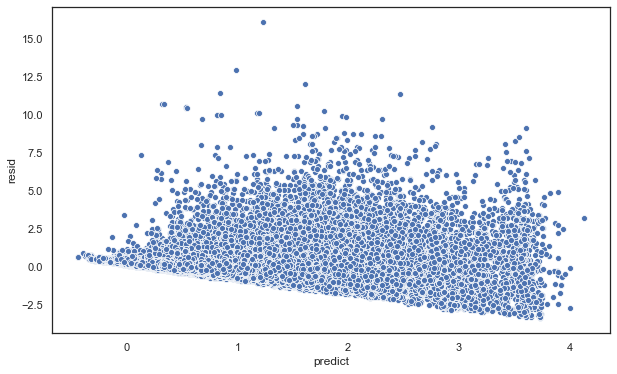

In [74]:
figax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=df_30,
                    x="predict",
                    y="resid");


## This model is still not statistically relevant enough to base predictions off of. We decide to abandon this idea and move on to the US only data, to see if there is a stronger correlation between amenity and price within a smaller region. Our US data also allows us the ability to control for cities, which could increase the R value